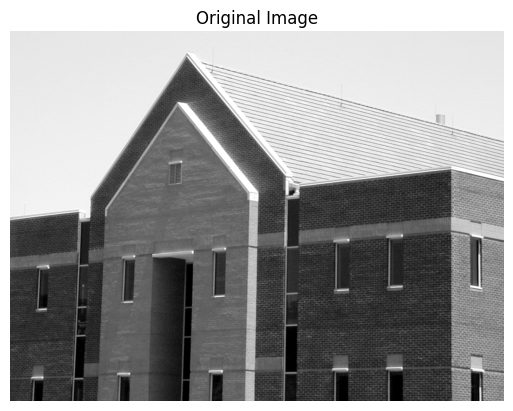

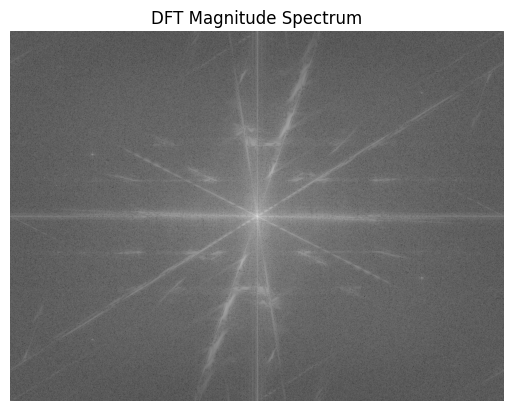

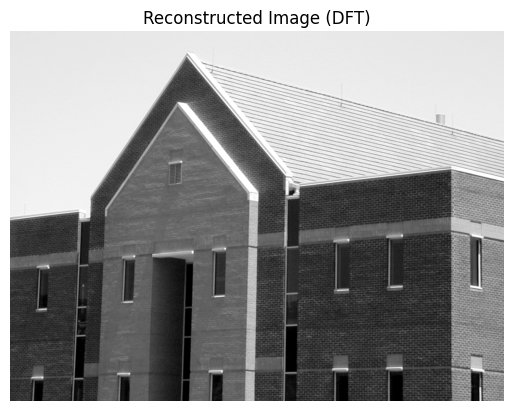

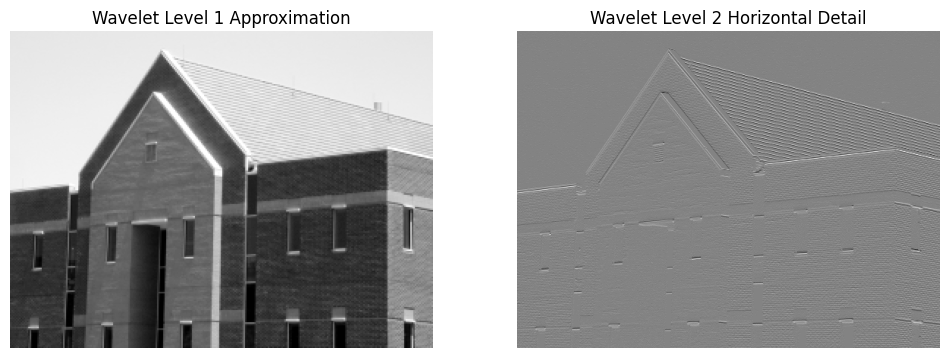

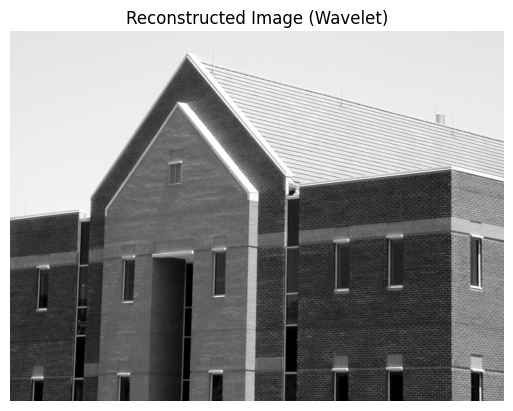

Comparing both of them -: 

DFT: 48.72 dB
Wavelet: 48.75 dB
Comparing both of them by vsualization -: 



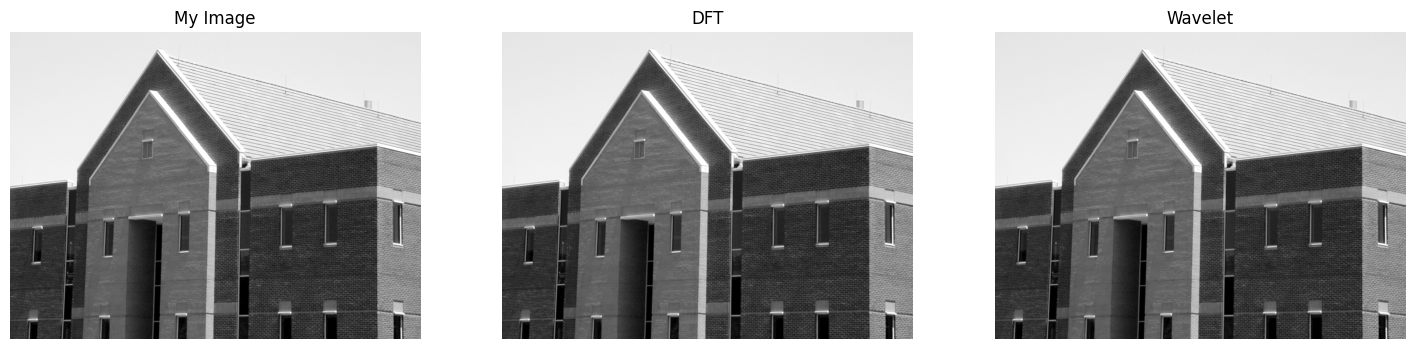

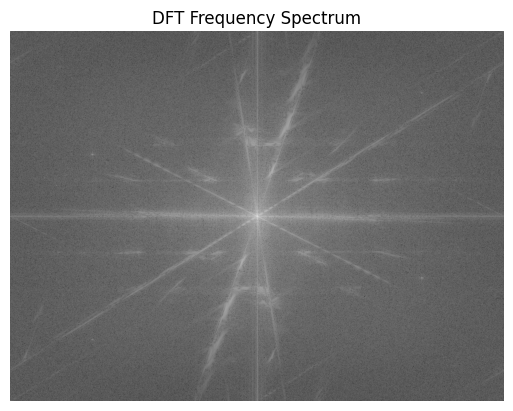

NameError: name 'cA2' is not defined

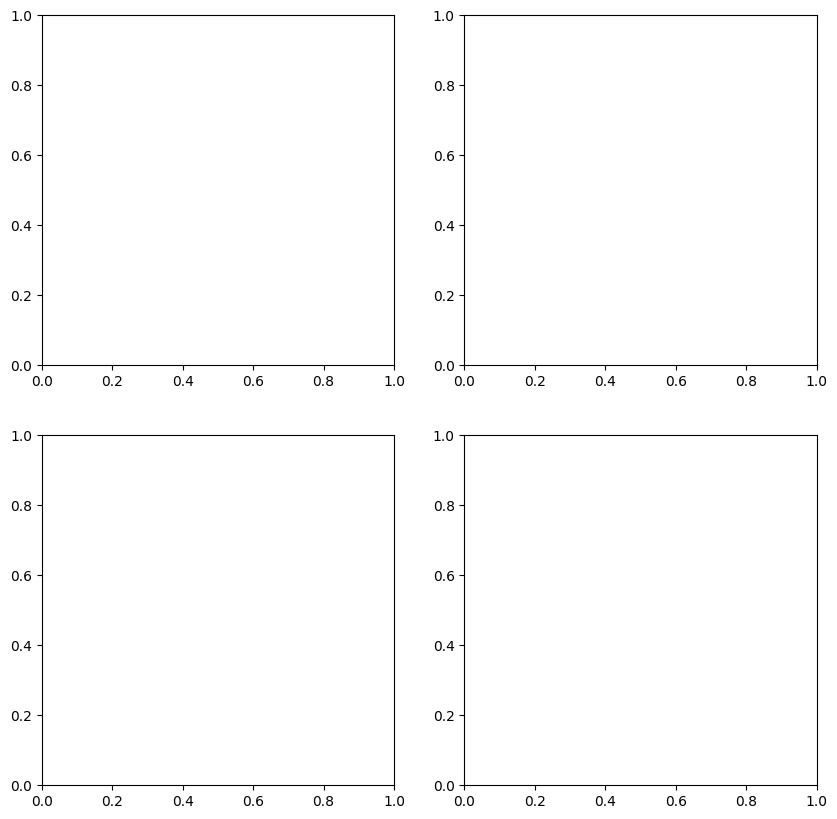

In [4]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Load the grayscale image
image_path = 'image.tif'  # Replace with the actual image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Apply DFT
dft = cv2.dft(np.float32(original_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Calculate magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)

# Visualize the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Magnitude Spectrum')
plt.axis('off')
plt.show()

# Reconstruct image using Inverse DFT
idft_shift = np.fft.ifftshift(dft_shift)
reconstructed_image_dft = cv2.idft(idft_shift)
reconstructed_image_dft = cv2.magnitude(reconstructed_image_dft[:,:,0], reconstructed_image_dft[:,:,1])

# Normalize the reconstructed image
reconstructed_image_dft = cv2.normalize(reconstructed_image_dft, None, 0, 255, cv2.NORM_MINMAX)
reconstructed_image_dft = reconstructed_image_dft.astype(np.uint8)

# Display the reconstructed image
plt.imshow(reconstructed_image_dft, cmap='gray')
plt.title('Reconstructed Image (DFT)')
plt.axis('off')
plt.show()

#!pip install PyWavelets
# Apply Wavelet Transform (using Haar wavelet)
coeffs = pywt.wavedec2(original_image, 'haar', level=2)

# Level 1 decomposition details
cA1 = coeffs[0]  # Approximation at the highest level
(cH1, cV1, cD1) = coeffs[1]  # Horizontal, vertical, and diagonal details at level 1

# Level 2 decomposition details
(cH2, cV2, cD2) = coeffs[2]  # Horizontal, vertical, and diagonal details at level 2

# Visualize wavelet decomposition for level 1 and level 2 approximations
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display approximation at level 1
axes[0].imshow(cA1, cmap='gray')
axes[0].set_title('Wavelet Level 1 Approximation')
axes[0].axis('off')

# Display horizontal detail at level 2
axes[1].imshow(cH2, cmap='gray')
axes[1].set_title('Wavelet Level 2 Horizontal Detail')
axes[1].axis('off')

plt.show()
# Reconstruct the image using the inverse Wavelet Transform
reconstructed_image_wavelet = pywt.waverec2(coeffs, 'haar')

# Normalize the reconstructed image to ensure pixel values are between 0 and 255
reconstructed_image_wavelet = cv2.normalize(reconstructed_image_wavelet, None, 0, 255, cv2.NORM_MINMAX)
reconstructed_image_wavelet = reconstructed_image_wavelet.astype(np.uint8)

# Display the reconstructed image from the Wavelet transform
plt.imshow(reconstructed_image_wavelet, cmap='gray')
plt.title('Reconstructed Image (Wavelet)')
plt.axis('off')
plt.show()

from skimage.metrics import peak_signal_noise_ratio as psnr

# Calculate PSNR for DFT-reconstructed image
psnr_dft = psnr(original_image, reconstructed_image_dft)

# Calculate PSNR for Wavelet-reconstructed image
psnr_wavelet = psnr(original_image, reconstructed_image_wavelet)

print("Comparing both of them -: \n")
print(f'DFT: {psnr_dft:.2f} dB')
print(f'Wavelet: {psnr_wavelet:.2f} dB')
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

print("Comparing both of them by vsualization -: \n")


axs[0].imshow(original_image, cmap='gray')
axs[0].set_title('My Image')
axs[0].axis('off')

axs[1].imshow(reconstructed_image_dft, cmap='gray')
axs[1].set_title('DFT')
axs[1].axis('off')

axs[2].imshow(reconstructed_image_wavelet, cmap='gray')
axs[2].set_title('Wavelet')
axs[2].axis('off')

plt.show()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Frequency Spectrum')
plt.axis('off')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
titles = ['Approximation', 'Horizontal detail', 'Vertical detail', 'Diagonal detail']
components = [cA2, cH2, cV2, cD2]

for i, ax in enumerate(axes.flat):
    ax.imshow(components[i], cmap='gray')
    ax.set_title(f'Wavelet Level 2 - {titles[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()
